In [1]:
!pip install tensorflow

In [2]:
pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\salsabila\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

In [3]:
import zipfile
import os
from sklearn.model_selection import train_test_split

with zipfile.ZipFile('img_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('extract')

image_paths = []
with zipfile.ZipFile('img_dataset.zip', 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        image_paths.append(file_info.filename)

In [1]:
import matplotlib.pyplot as plt
import io
from PIL import Image
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
import os
from sklearn.model_selection import train_test_split

# Directory paths
gunung_dir = './extract/img_dataset/gunung'
pantai_dir = './extract/img_dataset/pantai'
candi_dir = './extract/img_dataset/candi'
museum_dir = './extract/img_dataset/museum'
airterjun_dir = './extract/img_dataset/air terjun'
sungai_dir = './extract/img_dataset/sungai'
tamanbermain_dir = './extract/img_dataset/taman bermain'

# Get file names from directories
gunung_files = [os.path.join(gunung_dir, file) for file in os.listdir(gunung_dir)]
pantai_files = [os.path.join(pantai_dir, file) for file in os.listdir(pantai_dir)]
candi_files = [os.path.join(candi_dir, file) for file in os.listdir(candi_dir)]
museum_files = [os.path.join(museum_dir, file) for file in os.listdir(museum_dir)]
airterjun_files = [os.path.join(airterjun_dir, file) for file in os.listdir(airterjun_dir)]
sungai_files = [os.path.join(sungai_dir, file) for file in os.listdir(sungai_dir)]
tamanbermain_files = [os.path.join(tamanbermain_dir, file) for file in os.listdir(tamanbermain_dir)]

# Train-test split for each category
gunung_train, gunung_val = train_test_split(gunung_files, test_size=0.2, random_state=42)
pantai_train, pantai_val = train_test_split(pantai_files, test_size=0.2, random_state=42)
candi_train, candi_val = train_test_split(candi_files, test_size=0.2, random_state=42)
museum_train, museum_val = train_test_split(museum_files, test_size=0.2, random_state=42)
airterjun_train, airterjun_val = train_test_split(airterjun_files, test_size=0.2, random_state=42)
sungai_train, sungai_val = train_test_split(sungai_files, test_size=0.2, random_state=42)
tamanbermain_train, tamanbermain_val = train_test_split(tamanbermain_files, test_size=0.2, random_state=42)


Sample Gunung image:


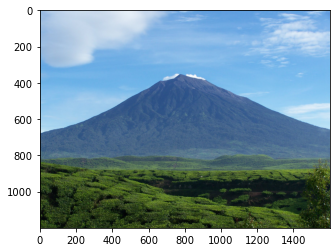


Sample Pantai image:


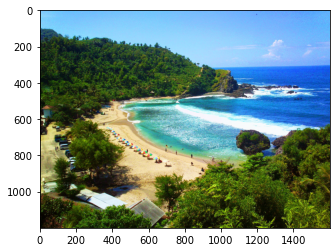

Sample Candi image:


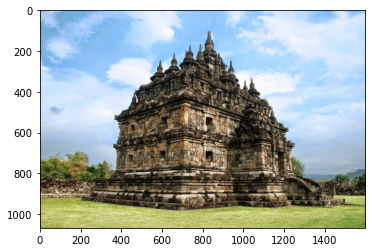


Sample Museum image:


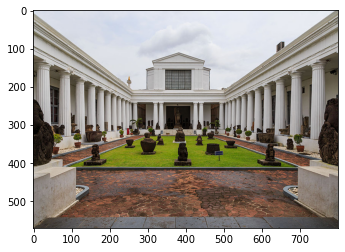

Sample Air Terjun image:


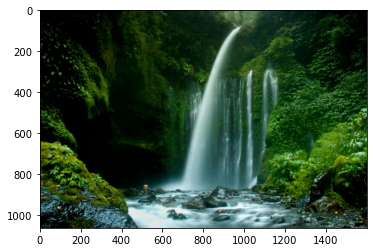


Sample Sungai image:


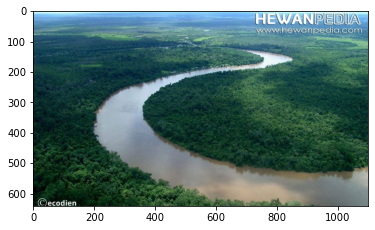

Sample Taman Bermain image:


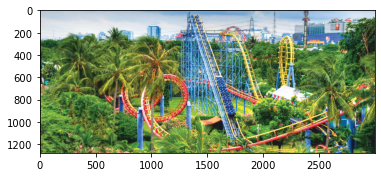

In [11]:
print("Sample Gunung image:")
plt.imshow(load_img(os.path.join(gunung_dir, os.listdir(gunung_dir)[0])))
plt.show()

print("\nSample Pantai image:")
plt.imshow(load_img(os.path.join(pantai_dir, os.listdir(pantai_dir)[0])))
plt.show()

print("Sample Candi image:")
plt.imshow(load_img(os.path.join(candi_dir, os.listdir(candi_dir)[0])))
plt.show()

print("\nSample Museum image:")
plt.imshow(load_img(os.path.join(museum_dir, os.listdir(museum_dir)[0])))
plt.show()

print("Sample Air Terjun image:")
plt.imshow(load_img(os.path.join(airterjun_dir, os.listdir(airterjun_dir)[0])))
plt.show()

print("\nSample Sungai image:")
plt.imshow(load_img(os.path.join(sungai_dir, os.listdir(sungai_dir)[0])))
plt.show()

print("Sample Taman Bermain image:")
plt.imshow(load_img(os.path.join(tamanbermain_dir, os.listdir(tamanbermain_dir)[0])))
plt.show()

In [13]:
for root, dirs, files in os.walk('extract'):
    if files:
        print("Folder:", os.path.basename(root))
        print("Files:")
        for file in files:
            print(os.path.join(root, file))
        print()

Folder: air terjun
Files:
extract\img_dataset\air terjun\Image_1.jpg
extract\img_dataset\air terjun\Image_10.jpg
extract\img_dataset\air terjun\Image_101.jpg
extract\img_dataset\air terjun\Image_104.jpg
extract\img_dataset\air terjun\Image_105.jpg
extract\img_dataset\air terjun\Image_106.jpg
extract\img_dataset\air terjun\Image_107.jpg
extract\img_dataset\air terjun\Image_11.jpg
extract\img_dataset\air terjun\Image_110.jpg
extract\img_dataset\air terjun\Image_111.jpg
extract\img_dataset\air terjun\Image_113.jpg
extract\img_dataset\air terjun\Image_114.jpg
extract\img_dataset\air terjun\Image_115.jpg
extract\img_dataset\air terjun\Image_117.jpg
extract\img_dataset\air terjun\Image_118.jpg
extract\img_dataset\air terjun\Image_119.jpg
extract\img_dataset\air terjun\Image_12.jpg
extract\img_dataset\air terjun\Image_122.jpg
extract\img_dataset\air terjun\Image_124.jpeg
extract\img_dataset\air terjun\Image_126.jpg
extract\img_dataset\air terjun\Image_127.jpg
extract\img_dataset\air terjun\Im

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_files = gunung_train + pantai_train + candi_train + museum_train + airterjun_train + sungai_train + tamanbermain_train
val_files = gunung_val + pantai_val + candi_val + museum_val + airterjun_val + sungai_val + tamanbermain_val
labels_train = ['gunung'] * len(gunung_train) + ['pantai'] * len(pantai_train) + ['candi'] * len(candi_train) + ['museum'] * len(museum_train) + ['airterjun'] * len(airterjun_train) + ['sungai'] * len(sungai_train) + ['tamanbermain'] * len(tamanbermain_train)
labels_val = ['gunung'] * len(gunung_val) + ['pantai'] * len(pantai_val) + ['candi'] * len(candi_val) + ['museum'] * len(museum_val) + ['airterjun'] * len(airterjun_val) + ['sungai'] * len(sungai_val) + ['tamanbermain'] * len(tamanbermain_val)

# dataframe for training
train_df = pd.DataFrame({
    'file_path': train_files,
    'label': labels_train
})

# dataframe for validation
val_df = pd.DataFrame({
    'file_path': val_files,
    'label': labels_val
})

# augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

# generator data for data training
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

# generator data for data validation
val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='file_path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)

Found 642 validated image filenames belonging to 7 classes.
Found 165 validated image filenames belonging to 7 classes.


In [18]:
history = model.fit(
    train_generator,
    epochs=100,
    verbose=2,
    validation_data=val_generator
)

Epoch 1/100
21/21 - 56s - loss: 1.9341 - accuracy: 0.2430 - val_loss: 1.8993 - val_accuracy: 0.2364 - 56s/epoch - 3s/step
Epoch 2/100
21/21 - 44s - loss: 1.7490 - accuracy: 0.2555 - val_loss: 1.6391 - val_accuracy: 0.3515 - 44s/epoch - 2s/step
Epoch 3/100
21/21 - 43s - loss: 1.5756 - accuracy: 0.3847 - val_loss: 1.4566 - val_accuracy: 0.4303 - 43s/epoch - 2s/step
Epoch 4/100
21/21 - 40s - loss: 1.5869 - accuracy: 0.3925 - val_loss: 1.5068 - val_accuracy: 0.4303 - 40s/epoch - 2s/step
Epoch 5/100
21/21 - 40s - loss: 1.4594 - accuracy: 0.4346 - val_loss: 1.3712 - val_accuracy: 0.4606 - 40s/epoch - 2s/step
Epoch 6/100
21/21 - 40s - loss: 1.3920 - accuracy: 0.4595 - val_loss: 1.3845 - val_accuracy: 0.4667 - 40s/epoch - 2s/step
Epoch 7/100
21/21 - 39s - loss: 1.3464 - accuracy: 0.4642 - val_loss: 1.2940 - val_accuracy: 0.4485 - 39s/epoch - 2s/step
Epoch 8/100
21/21 - 41s - loss: 1.2569 - accuracy: 0.5218 - val_loss: 1.2515 - val_accuracy: 0.5091 - 41s/epoch - 2s/step
Epoch 9/100
21/21 - 40s 

In [19]:
model.save('classification.h5')

In [20]:
from IPython.display import FileLink

FileLink('classification.h5')

C:\Users\Salsabila\classification.h5